In [ ]:
!pip install ultralytics
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/python/car-brand/car-brand.v12-hey-11.yolov8.zip" "/content/"

In [ ]:
import zipfile

zip_path = "/content/car-brand.v12-hey-11.yolov8.zip"
extract_path = "/content/car-brand.v12-hey-11.yolov8"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dosyalar çıkarıldı:", extract_path)


Dosyalar çıkarıldı: /content/car-brand.v12-hey-11.yolov8


In [ ]:
# Dataset yolu
dataset_path = "/content/car-brand.v12-hey-11.yolov8"

train_json = f"{dataset_path}/train/_annotations.coco.json"
val_json   = f"{dataset_path}/valid/_annotations.coco.json"

train_images = f"{dataset_path}/train"
val_images   = f"{dataset_path}/valid"

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class MobileNetV2Backbone(nn.Module):
    def __init__(self, out_channels=128):
        super().__init__()
        mobilenet = models.mobilenet_v2(weights="IMAGENET1K_V1")
        self.features = mobilenet.features
        self.conv = nn.Conv2d(1280, out_channels, 1)  # YOLO head’e uyumlu çıkış

    def forward(self, x):
        x = self.features(x)
        x = self.conv(x)
        return x


In [ ]:
from ultralytics import YOLO

# Önceden eğitilmiş küçük YOLOv8 modeli
model = YOLO("yolov8m.pt")

# Backbone’u MobileNet ile değiştir
model.model.backbone = MobileNetV2Backbone(out_channels=128)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 116MB/s]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
model.model.backbone = MobileNetV2Backbone(out_channels=128)  # opsiyonel

model.train(
    data="/content/car-brand.v12-hey-11.yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    patience=10,
    save=True
)


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car-brand.v12-hey-11.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plot

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f85e2f738c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [ ]:
from ultralytics import YOLO

# Modeli yükle
model = YOLO("/content/runs/detect/train/weights/best.pt")  # kendi eğittiğin .pt model yolunu yaz

# Test setinde değerlendir
metrics = model.val(
    data="/content/car-brand.v12-hey-11.yolov8/data.yaml",  # dataset yaml dosyası
    split="test",   # test klasöründe çalıştır
    conf=0.25,
    save_json=True
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,858,867 parameters, 0 gradients, 78.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1459.9±300.6 MB/s, size: 67.8 KB)
val: Scanning /content/car-brand.v12-hey-11.yolov8/test/labels... 131 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 131/131 2.6Kit/s 0.0s
val: New cache created: /content/car-brand.v12-hey-11.yolov8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 2.1it/s 4.3s
                   all        131        138      0.815      0.761      0.837       0.53
                  audi          8         12          1        0.5       0.75       0.41
                   bmw          5          5       0.75        0.6      0.749      0.562
                   byd          2          2        0.5          1      0.995      0.609
             chevrolet          2          2   

In [ ]:
!cp -r /content/runs/* /content/drive/MyDrive/python/car-brand/yolo-and-mobilenet

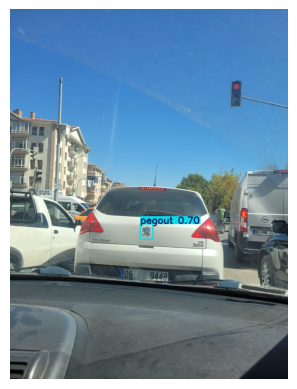

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Örnek resim yolunu ver
img_path = "/content/3.jpg"

results = model.predict(source=img_path, conf=0.25)

# Görseli çizdir
for r in results:
    im_array = r.plot()  # anotasyonlu resim
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:
!cp /content/drive/MyDrive/python/car-brand/20250921_175437.mp4 /content/input.mp4

In [ ]:
import cv2
from tqdm import tqdm

video_path = "/content/input.mp4"
cap = cv2.VideoCapture(video_path)

# Video bilgileri
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Çıkış videosu (FPS 7'de 1 olacak şekilde)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("/content/output.mp4", fourcc, fps/7, (width, height))

frame_id = 0

with tqdm(total=frame_count, desc="Processing video", unit="frame") as pbar:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_id += 1

        # Sadece her 7. kareyi işle
        if frame_id % 7 == 0:
            results = model.predict(frame, conf=0.25, verbose=False)
            annotated_frame = results[0].plot()
            out.write(annotated_frame)

        pbar.update(1)  # ilerleme çubuğunu güncelle

cap.release()
out.release()
cv2.destroyAllWindows()

print("Video kaydedildi: /content/output.mp4")


Processing video: 100%|██████████| 4073/4073 [04:57<00:00, 13.71frame/s]

Video kaydedildi: /content/output.mp4


In [ ]:
!cp /content/output.mp4 /content/drive/MyDrive/python/car-brand/output.mp4